# Notebook para corregir la perpectiva empleando predicciones de Unet  

Permite procesar imágenes con fondo complejo, es nesesario máscraras de predicción del modelo de ~deep learning~ 

In [1]:
# Importación de librerías
import numpy as np
import cv2 as cv
import os
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys

from ipywidgets import interactive, widgets, Layout

%matplotlib inline 
from pv_vision.transform_crop.solarmodule import MaskModule

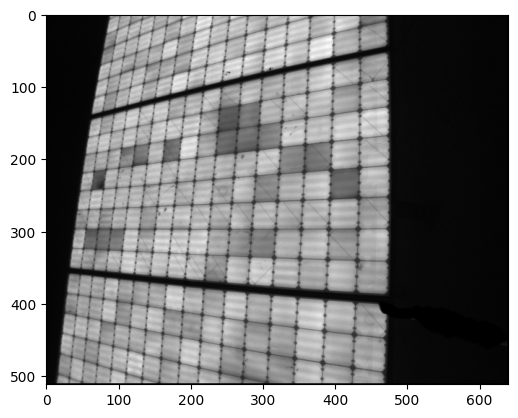

In [2]:
# Cargado de la imagen en escala de grises
# Creación de una instancia de raw module
img = cv.imread('D:/Documentos/PV_Vision/pv-vision/examples/transform_seg/field_pipeline/raw_img_gray/example_1.png', cv.IMREAD_UNCHANGED)
# redimensionar la imagen a 256x256
#img = cv.resize(img, (256, 256), interpolation=cv.INTER_AREA)
raw_module = MaskModule(img, 8, 16, 0) # 8 rows && 16 columns && 0 busbar
plt.imshow(raw_module.image, 'gray')

dimensiones de la máscara de predicción:  (512, 640)


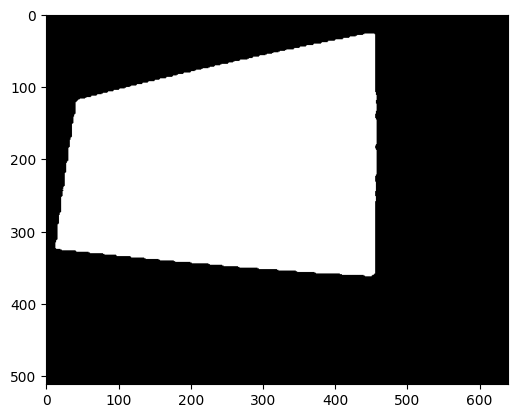

In [26]:
# Se carga las anotaciones de la máscara de predicción de UNet
raw_module.load_mask(
    'D:/Documentos/Universidad de Cuenca/Trabajo de Titulación/Predicciones/Modulos/output_json/example_1.json')
#raw_module.load_mask('D:/Documentos/Universidad de Cuenca/Trabajo de Titulación/PVDefectDetect/EjemplosPV-vision/module_imgs/example_1.png.json')

plt.imshow(raw_module.mask, 'gray')
print("dimensiones de la máscara de predicción: ", raw_module.mask.shape)

In [21]:
# Encontrar las esquinas con el método corner_detection_cont()

def update_corner(mode):
    corners = raw_module.corner_detection_cont(output=True, mode=mode)
    x, y = zip(*corners)

    plt.figure(figsize=(8, 6))
    plt.imshow(raw_module.mask, 'gray')
    plt.scatter(x, y, c='r')

mode=widgets.IntSlider(value=4, min=0, max=4, step=1)
interactive(update_corner,
            mode=mode)

interactive(children=(IntSlider(value=4, description='mode', max=4), Output()), _dom_classes=('widget-interact…

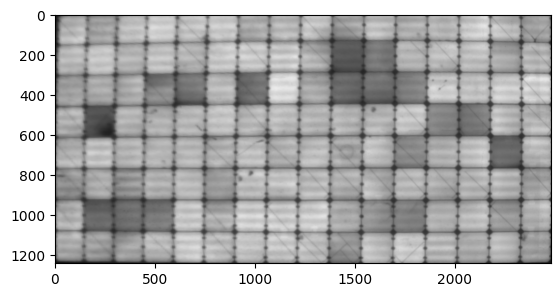

In [22]:
# Transformación de perspectiva
# do perspective transform
img_transformed = raw_module.transform(width=600, height=300, cellsize=155, img_only=True, )
plt.imshow(img_transformed, 'gray')
# you can also set "img_only=False" to output a transformed module instance. This will be useful
# when you want to crop out single cells

In [ ]:



# tune the parameters for the vertical edges

def update_edges(vl_split_size, vl_interval, vl_margin, vl_thre):
    fig = plt.figure(figsize=(8, 6))
    raw_module.plot_peaks(n_list=[5, 8, 12], split_size=vl_split_size,
                          interval=vl_interval, margin=vl_margin, thre=vl_thre, direction=0)

inner_edges_para = {
    'vl_interval': widgets.IntText(value=40),
    'vl_thre': widgets.FloatText(value=0.9),
    'vl_split_size': widgets.IntText(value=20),
    'vl_margin': widgets.IntText(value=40)
}

interactive(update_edges, **inner_edges_para)
# tune the parameters for the horizontal edges

def update_edges(hl_split_size, hl_interval, hl_margin, hl_thre):
    fig = plt.figure(figsize=(8, 6))
    raw_module.plot_peaks(n_list=[5, 8, 12], split_size=hl_split_size,
                          interval=hl_interval, margin=hl_margin, thre=hl_thre, direction=1)

inner_edges_para = {
    'hl_interval': widgets.IntText(value=50),
    'hl_thre': widgets.FloatText(value=0.9),
    'hl_split_size': widgets.IntText(value=20),
    'hl_margin': widgets.IntText(value=20)
}

interactive(update_edges, **inner_edges_para)
# crop the cells. Here we visualize the detected internal edges
# you can pass the cropped cells to single_cells.
single_cells = raw_module.crop_cell(32, plot=True)